In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

drive_path = r'C:/Users/kyung/Desktop/data_visu/covid_dataset/'

In [3]:
patient_info = pd.read_csv(drive_path + 'PatientInfo.csv')
print(patient_info.info())
patient_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


In [4]:
# infection_ case 에서 결측치 있는 행 제거
# -> 사실 안해도 되지만 그냥 나중에 쓸일이 있을 수 도 있으니..
df = patient_info.dropna(subset = ['infection_case'], axis = 0)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
# infection_case들 확인
df['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', 'Itaewon Clubs',
       'Samsung Medical Center', 'Coupang Logistics Center',
       'Guri Collective Infection', 'KB Life Insurance',
       'Yeongdeungpo Learning Institute', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten',
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

In [6]:
# infection_case = overseas inflow 인것만 남기기
df_by_case = df[df['infection_case'] == 'overseas inflow']
df_by_case.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
7,1000000008,13.0,male,1992,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68,NaN,2020-02-05,2020-02-21,NaN,released


In [7]:
#연령대별로 구분하기
case_by_age = df_by_case['age'].value_counts()
case_by_age

20s    257
30s    141
40s     58
50s     53
60s     46
10s     34
0s      14
70s      6
80s      1
Name: age, dtype: int64

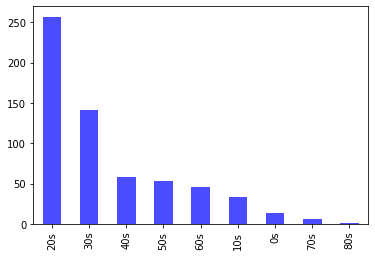

In [13]:
case_by_age.plot.bar(color="blue", alpha = 0.7)
plt.show()

In [ ]:
# labels = [ '0s', '10s','20s', '30s', '40s', '50s', '60s', '70s', '80s']
# df = pd.DataFrame({'counts': list(case_by_age)}, index = labels)
# # case_by_age.plot.bar(color="blue", alpha = 0.7)
# df.plot.bar(color="blue", alpha = 0.7)
# plt.show()